In [49]:

import matplotlib.pyplot as plt
import numpy as np

from collections import defaultdict
from itertools import product,combinations

In [56]:

base_path = '../KP_result/fastANI'

gene_count_file = f'{base_path}/KP2809样本信息最正确.txt'

fast_ani_file = f'../KP_result/fastANI/2809-square.fastANI.tsv'
#fast_ani_file = f'../KP_result/fastANI/total-fastANI.2023-0609.tsv'

violin_save_file = f'{base_path}/fastANI.violin.png'


In [123]:
def read_host_to_gcf(gene_count_file: str):
    
    
    host_to_gcf = defaultdict(set)
    
    gcf_to_host = {}
    with open(gene_count_file) as f:
        f.readline()
        for line in f:
            l = line.strip().split('\t')
            
            if len(l) < 20:
                continue
                
            
            
            gcf = l[0]
            
            host = l[19]
            
            if host == 'Swine':
                host = 'swine'
            
            
            
            host_to_gcf[host].add(gcf)
            
            gcf_to_host[gcf] = host
    return host_to_gcf, gcf_to_host

host_to_gcf, gcf_to_host = read_host_to_gcf(gene_count_file)

print(f'{len(host_to_gcf):,} hosts, {len(gcf_to_host):,} gcf.')

9 hosts, 2,809 gcf.


In [124]:
host_to_gcf.keys()

dict_keys(['homo', 'swine', 'chicken', 'cow', 'not collection', 'dog', 'Environment', 'cat', 'blowfly'])

In [125]:
for host, gcf_set in host_to_gcf.items():
    print(f'{host}: {len(gcf_set):,} samples.')

homo: 2,258 samples.
swine: 135 samples.
chicken: 126 samples.
cow: 54 samples.
not collection: 111 samples.
dog: 48 samples.
Environment: 33 samples.
cat: 23 samples.
blowfly: 21 samples.


In [126]:
# homo-homo, homo-swine, homo-cow, homo-chicken, homo-dog 
# swine-swine, cow-cow, chicken-chicken, dog-dog

In [127]:
def read_fastani_file(fastani_file: str, gcf_to_host: dict):
    
    gcf_pari_to_score = {}
    
    total_gcf = set(gcf_to_host.keys())
    print(f'total {len(total_gcf):,} gcfs.')
    
    match_gcf_set = set()
    process_num = 0
    saved_set = set()
    with open(fastani_file) as f:
        for line in f:
                        
                       
            l = line.strip().split('\t')
                        
            gcf_0 = '.'.join(l[0].split('.')[:-1])
            gcf_1 = '.'.join(l[1].split('.')[:-1])
            
            score = float(l[2])
            
            #if score < 0.7:
                #print(score)
            
            if (gcf_0, gcf_1) in saved_set or (gcf_1, gcf_0) in saved_set:
                continue
            saved_set.add((gcf_0, gcf_1))
            
            if gcf_0 == gcf_1:
                continue
            
            #print(gcf_0)
            #print(gcf_1)
            #input()
                        
            if not gcf_to_host.get(gcf_0) or not gcf_to_host.get(gcf_1):
                print(gcf_0)
                print(gcf_1)
                
                continue
            match_gcf_set.add(gcf_0)
            match_gcf_set.add(gcf_0)
                
            #print(gcf_0)
            #print(gcf_1)
            #input()
            
            gcf_pari_to_score[(gcf_0, gcf_1)] = score
            
    print(f'{len(gcf_pari_to_score):,} gcf pairs loaded.')
    print(f'match gcf: {len(match_gcf_set)}')
    print(f'miss: {total_gcf-match_gcf_set}')
    return gcf_pari_to_score, match_gcf_set

gcf_pair_to_score, match_gcf_set = read_fastani_file(fast_ani_file, gcf_to_host)
            
    

total 2,809 gcfs.
3,943,836 gcf pairs loaded.
match gcf: 2809
miss: set()


In [133]:
host_to_gcf

defaultdict(set,
            {'homo': {'GCF_000787995.1',
              'GCF_008634555.1',
              'GCF_021137635.1',
              'GCF_001904165.4',
              'GCF_001185755.1',
              'GCF_021415885.1',
              'GCF_002636375.1',
              'GCF_002854585.1',
              'GCF_005862195.1',
              'GCF_004831765.1',
              'GCF_000982205.1',
              'GCF_002152655.1',
              'GCF_022554495.1',
              'GCF_018274745.1',
              'GCF_021727335.1',
              'GCF_021213815.1',
              'GCF_020178845.1',
              'GCF_001483725.1',
              'GCF_003226095.1',
              'GCF_019794995.1',
              'GCF_006542065.2',
              'GCF_019455345.1',
              'GCF_916172845.1',
              'GCF_008704085.1',
              'GCF_902508475.1',
              'GCF_018682505.1',
              'GCF_900493085.1',
              'GCF_900086375.1',
              'GCF_021398425.1',
              'GCF

In [135]:
# fix the order
host_to_gcf_list = {host: list(gcf_set) for host, gcf_set in host_to_gcf.items()}

In [136]:
#len(host_to_gcf_list['Swine'])+len(host_to_gcf_list['swine'])

In [137]:
gcf_pair_to_score

{('GCF_900512695.1', 'GCF_021415905.1'): 98.9491,
 ('GCF_902705705.1', 'GCF_900086415.1'): 99.3938,
 ('GCF_900494545.1', 'GCF_011682885.1'): 98.9923,
 ('GCF_900085795.1', 'GCF_006130105.1'): 98.8748,
 ('GCF_021414865.1', 'GCF_016758015.1'): 98.8826,
 ('GCF_001032535.1', 'GCF_002257865.1'): 99.0889,
 ('GCF_002856155.1', 'GCF_002935815.2'): 99.1198,
 ('GCF_001033135.1', 'GCF_900172555.1'): 98.938,
 ('GCF_014526165.1', 'GCF_002852455.1'): 98.8679,
 ('GCF_916172155.1', 'GCF_900172135.1'): 99.0505,
 ('GCF_000694135.1', 'GCF_016680875.1'): 99.5599,
 ('GCF_002857345.1', 'GCF_013378155.1'): 98.9804,
 ('GCF_022554815.1', 'GCF_004284565.1'): 98.9869,
 ('GCF_008756805.1', 'GCF_001945475.1'): 99.027,
 ('GCF_003400925.1', 'GCF_003196655.1'): 98.9408,
 ('GCF_002262855.1', 'GCF_021137895.1'): 98.8429,
 ('GCF_003195875.1', 'GCF_000599925.1'): 99.6358,
 ('GCF_900171755.1', 'GCF_011037455.1'): 99.0028,
 ('GCF_900007005.1', 'GCF_019165655.1'): 98.9074,
 ('GCF_902165145.1', 'GCF_900086165.1'): 99.1064,
 (

In [138]:
# 彭老师要的大表

host_list = ['swine', 'cow', 'chicken', 'dog',
                 'Environment', 'cat', 'blowfly']
with open(f'{base_path}/big-table.pengzhong.new.2.tsv', 'w') as wf:
    head = ['-']
    for host in host_list:
        head.extend([host]*len(host_to_gcf_list[host]))
    head_wf = '\t'.join(head)
    wf.write(f'{head_wf}\n')
    
    head = ['-']
    for host in host_list:
        head.extend(host_to_gcf_list[host])
        head_wf = '\t'.join(head)
    wf.write(f'{head_wf}\n')
        
        
        
    for gcf1 in host_to_gcf_list['homo']:
        gcf_line = [gcf1]
        for host in host_list:
            for gcf2 in host_to_gcf_list[host]:
                if gcf_pair_to_score.get((gcf2, gcf1)):
                    gcf_line.append(gcf_pair_to_score[(gcf2, gcf1)])
                else:
                    gcf_line.append(gcf_pair_to_score[(gcf1, gcf2)])
        gcf_wf = '\t'.join(map(str, gcf_line))
        wf.write(f'{gcf_wf}\n')
print(f'{base_path}/big-table.pengzhong.new.2.tsv saved.')
            
            

../KP_result/fastANI/big-table.pengzhong.new.2.tsv saved.


In [ ]:
# homo-homo, homo-swine, homo-cow, homo-chicken, homo-dog 
# swine-swine, cow-cow, chicken-chicken, dog-dog

In [143]:
#save_host_set = {'homo', 'swine', 'cow', 'chicken', 'dog'}
save_host_set = {'homo', 'swine', 'cow', 'chicken', 'dog',
                 'Environment', 'cat', 'blowfly'}

In [144]:

wf_set = set()

host_type_to_save_set = defaultdict(set)

host_type_to_score_list = defaultdict(list)
for (gcf_0, gcf_1), score in gcf_pair_to_score.items():
    
    host_0 = gcf_to_host[gcf_0]
    host_1 = gcf_to_host[gcf_1]
    
    wf_list = [gcf_0, host_0, gcf_1, host_1, str(score)]
    
    
    if host_0 not in save_host_set or host_1 not in save_host_set:
        continue
    
    if (host_0 != 'homo' and host_1 != 'homo') and host_0 != host_1:
        continue
        
    if host_1 == 'homo':
        host_0, host_1 = host_1, host_0
        
    
    host_pair_name = f'{host_0}-{host_1}'
    #print(host_pair_name)
    #input()
    
    #if score < 97:
    #    continue
        
        
    host_type_to_score_list[host_pair_name].append(score)
    host_type_to_save_set[host_pair_name].add('\t'.join(wf_list))
    

In [145]:
for host_pair, score_list in host_type_to_score_list.items():
    
    host_0, host_1 = host_pair.split('-')
    
    sample_set_1 = host_to_gcf[host_0]
    sample_set_2 = host_to_gcf[host_1]
    
    #print(f'{len(sample_set_1):,}*{len(sample_set_2):,}={len(sample_set_1)*len(sample_set_2)/2:,}')
        
    print(f'{host_pair}: {len(score_list):,} sample_pairs.')


homo-homo: 2,548,153 sample_pairs.
homo-cow: 121,932 sample_pairs.
homo-chicken: 284,508 sample_pairs.
homo-cat: 51,934 sample_pairs.
homo-Environment: 74,514 sample_pairs.
swine-swine: 9,045 sample_pairs.
homo-swine: 304,830 sample_pairs.
homo-dog: 108,384 sample_pairs.
homo-blowfly: 47,418 sample_pairs.
chicken-chicken: 7,875 sample_pairs.
Environment-Environment: 528 sample_pairs.
blowfly-blowfly: 210 sample_pairs.
dog-dog: 1,128 sample_pairs.
cow-cow: 1,431 sample_pairs.
cat-cat: 253 sample_pairs.


In [146]:
host_pair_to_color = {
    'homo-homo': "#5470c6",
    'homo-cow': "#91cc75",
    'homo-chicken': "#fac858",
    'homo-swine': "#ee6666",
    'homo-dog': "#73c0de",
    'homo-cat': '#B0C4DE',
    'homo-blowfly': '#AFEEEE',
    'homo-Environment': '#F0E68C',
    
    'swine-swine': "#3ba272",
    'chicken-chicken': "#fc8452",
    'cow-cow': "#9a60b4",
    'dog-dog': "#ea7ccc",
    'cat-cat': '#FFA07A',
    'blowfly-blowfly': '#D8BFD8',
    'Environment-Environment': '#FFDEAD',
    
}

In [147]:

def to_box_data_label_color_list(type_to_degree_list: dict, type_to_color: list, sorted_key:list):

    data_list = []
    label_list = []
    color_list = []

    #sorted_key = sorted(type_to_degree_list.keys())
    

    for _type in sorted_key:
        degree_list = type_to_degree_list[_type]
        
        #print(_type)

        color = type_to_color[_type]
            
        data_list.append(degree_list)
        label_list.append(_type)
        color_list.append(color)
    return data_list, label_list, color_list

In [148]:
# new sort 
label_list = [
    
    'homo-dog',
    'homo-cat',
    'homo-Environment',
    'homo-chicken',
    'homo-swine',
    'homo-cow',
    'homo-blowfly',
    
    'homo-homo',
    'swine-swine',
    'chicken-chicken',
    'cow-cow',
    'dog-dog',
    'cat-cat',
    'blowfly-blowfly',
    'Environment-Environment',
]

In [149]:
all_data, label_list, color_list = to_box_data_label_color_list(host_type_to_score_list, host_pair_to_color, label_list)


../KP_result/fastANI/fastANI.host-ann-2.violin.png saved.


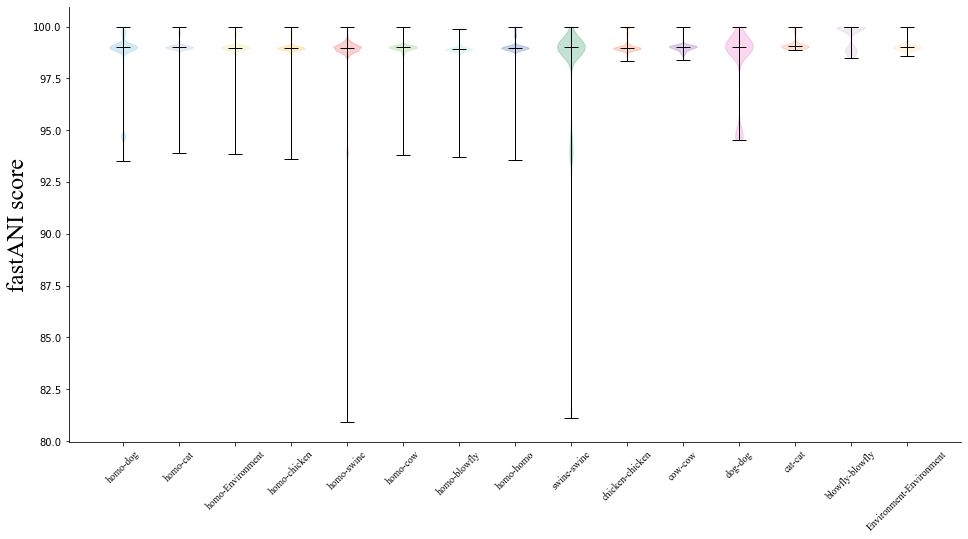

In [150]:

font_size = 24

fig, axes = plt.subplots(figsize=(16, 8))
violin_parts = axes.violinplot(all_data,
                               showmeans=False,
                               showmedians=True,
                               )


# 设置坐标轴可见
axes.spines[ 'right' ].set_visible(False)
axes.spines[ 'top' ].set_visible(False)

axes.set_ylabel('fastANI score', fontdict={'family': 'Times New Roman', 'size': font_size})
# plt.ylim(0, 200)

for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
    vp = violin_parts[ partname ]
    vp.set_edgecolor('black')
    vp.set_linewidth(1)

for idx, pc in enumerate(violin_parts[ 'bodies' ]):
    color = color_list[ idx ]

    pc.set_color(color)

#plt.yticks([  97, 98, 99, 100 ], fontproperties='Times New Roman', size=font_size - 2)

plt.xticks([ y + 1 for y in range(len(all_data)) ], label_list,
           rotation=45, fontsize=font_size, fontproperties='Times New Roman'
           )

plt.savefig(violin_save_file, dpi=630, bbox_inches='tight')
print(f'{violin_save_file} saved.')

In [151]:
violin_save_file

'../KP_result/fastANI/fastANI.host-ann-2.violin.png'

../KP_result/fastANI/fastANI.host-ann-1.violin.png saved.


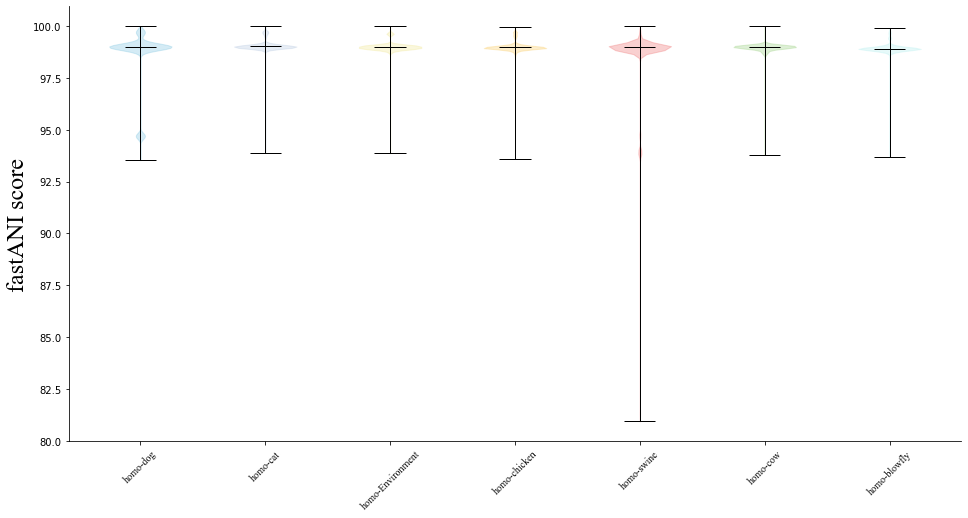

In [152]:
# first 7

violin_save_file = f'{base_path}/fastANI.host-ann-1.violin.png'


label_list = [
    'homo-dog',
    'homo-cat',
    'homo-Environment',
    'homo-chicken',
    'homo-swine',
    'homo-cow',
    'homo-blowfly',
]

all_data, label_list, color_list = to_box_data_label_color_list(host_type_to_score_list, host_pair_to_color, label_list)


font_size = 24

fig, axes = plt.subplots(figsize=(16, 8))
violin_parts = axes.violinplot(all_data,
                               showmeans=False,
                               showmedians=True,
                               )


# 设置坐标轴可见
axes.spines[ 'right' ].set_visible(False)
axes.spines[ 'top' ].set_visible(False)

axes.set_ylabel('fastANI score', fontdict={'family': 'Times New Roman', 'size': font_size})
# plt.ylim(0, 200)

for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
    vp = violin_parts[ partname ]
    vp.set_edgecolor('black')
    vp.set_linewidth(1)

for idx, pc in enumerate(violin_parts[ 'bodies' ]):
    color = color_list[ idx ]

    pc.set_color(color)

#plt.yticks([  97, 98, 99, 100 ], fontproperties='Times New Roman', size=font_size - 2)

plt.xticks([ y + 1 for y in range(len(all_data)) ], label_list,
           rotation=45, fontsize=font_size, fontproperties='Times New Roman'
           )

plt.savefig(violin_save_file, dpi=630, bbox_inches='tight')
print(f'{violin_save_file} saved.')



../KP_result/fastANI/fastANI.host-ann-2.violin.png saved.


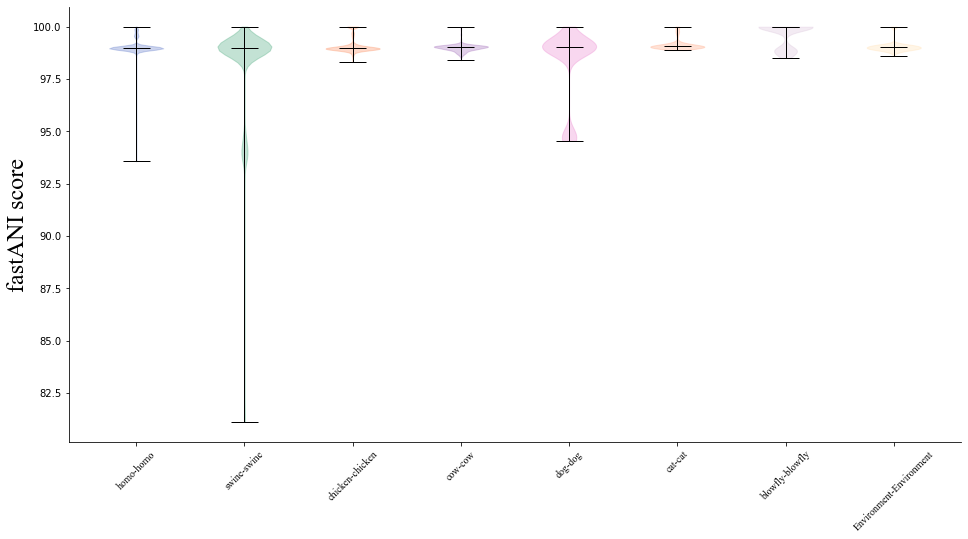

In [153]:
# last 8
violin_save_file = f'{base_path}/fastANI.host-ann-2.violin.png'


label_list = [
    'homo-homo',
    'swine-swine',
    'chicken-chicken',
    'cow-cow',
    'dog-dog',
    'cat-cat',
    'blowfly-blowfly',
    'Environment-Environment',
]

all_data, label_list, color_list = to_box_data_label_color_list(host_type_to_score_list, host_pair_to_color, label_list)


font_size = 24

fig, axes = plt.subplots(figsize=(16, 8))
violin_parts = axes.violinplot(all_data,
                               showmeans=False,
                               showmedians=True,
                               )


# 设置坐标轴可见
axes.spines[ 'right' ].set_visible(False)
axes.spines[ 'top' ].set_visible(False)

axes.set_ylabel('fastANI score', fontdict={'family': 'Times New Roman', 'size': font_size})
# plt.ylim(0, 200)

for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
    vp = violin_parts[ partname ]
    vp.set_edgecolor('black')
    vp.set_linewidth(1)

for idx, pc in enumerate(violin_parts[ 'bodies' ]):
    color = color_list[ idx ]

    pc.set_color(color)

#plt.yticks([  97, 98, 99, 100 ], fontproperties='Times New Roman', size=font_size - 2)

plt.xticks([ y + 1 for y in range(len(all_data)) ], label_list,
           rotation=45, fontsize=font_size, fontproperties='Times New Roman'
           )

plt.savefig(violin_save_file, dpi=630, bbox_inches='tight')
print(f'{violin_save_file} saved.')



In [155]:
for host_pair, score_list in host_type_to_score_list.items():
    
    print(host_pair)
    
    print(f'mean: {np.mean(score_list):.4f}, median: {np.median(score_list)}')
    print(f'Min: {np.min(score_list)}, Max: {np.max(score_list)}')
    print(f'STD: {np.std(score_list)}')
    q1, q2, q3 = np.percentile(score_list, [25, 50, 75])
    print("Quartiles 25% 50% 75%:", q1, q2, q3)

homo-homo
mean: 99.0489, median: 98.9851
Min: 93.556, Max: 100.0
STD: 0.3404192380985354
Quartiles 25% 50% 75%: 98.9139 98.9851 99.0687
homo-cow
mean: 98.9782, median: 98.9936
Min: 93.7941, Max: 99.984
STD: 0.1975507550749523
Quartiles 25% 50% 75%: 98.9202 98.9936 99.0597
homo-chicken
mean: 99.0086, median: 98.9695
Min: 93.6049, Max: 99.962
STD: 0.25619084365432243
Quartiles 25% 50% 75%: 98.91 98.9695 99.0403
homo-cat
mean: 99.0713, median: 99.0174
Min: 93.8874, Max: 99.9967
STD: 0.27020757498783954
Quartiles 25% 50% 75%: 98.9541 99.0174 99.0923
homo-Environment
mean: 99.0140, median: 98.9867
Min: 93.8568, Max: 99.9977
STD: 0.24606364244833892
Quartiles 25% 50% 75%: 98.9114 98.9867 99.0646
swine-swine
mean: 98.1429, median: 98.9956
Min: 81.1173, Max: 99.9997
STD: 2.6469892164495343
Quartiles 25% 50% 75%: 98.9075 98.9956 99.0611
homo-swine
mean: 98.5178, median: 98.9667
Min: 80.9293, Max: 99.9923
STD: 1.954736399681612
Quartiles 25% 50% 75%: 98.8956 98.9667 99.032
homo-dog
mean: 98.6255

In [156]:
len(wf_set)

0

In [157]:
host_type_to_save_set.keys()

dict_keys(['homo-homo', 'homo-cow', 'homo-chicken', 'homo-cat', 'homo-Environment', 'swine-swine', 'homo-swine', 'homo-dog', 'homo-blowfly', 'chicken-chicken', 'Environment-Environment', 'blowfly-blowfly', 'dog-dog', 'cow-cow', 'cat-cat'])

In [158]:
for host_type, save_set in host_type_to_save_set.items():
    save_file = f'{base_path}/{host_type}.fastANI.tsv'
    
    with open(save_file, 'w') as wf:
        for line in save_set:
            wf.write(f'{line}\n')
    print(f'{save_file} saved.')

../KP_result/fastANI/homo-homo.fastANI.tsv saved.
../KP_result/fastANI/homo-cow.fastANI.tsv saved.
../KP_result/fastANI/homo-chicken.fastANI.tsv saved.
../KP_result/fastANI/homo-cat.fastANI.tsv saved.
../KP_result/fastANI/homo-Environment.fastANI.tsv saved.
../KP_result/fastANI/swine-swine.fastANI.tsv saved.
../KP_result/fastANI/homo-swine.fastANI.tsv saved.
../KP_result/fastANI/homo-dog.fastANI.tsv saved.
../KP_result/fastANI/homo-blowfly.fastANI.tsv saved.
../KP_result/fastANI/chicken-chicken.fastANI.tsv saved.
../KP_result/fastANI/Environment-Environment.fastANI.tsv saved.
../KP_result/fastANI/blowfly-blowfly.fastANI.tsv saved.
../KP_result/fastANI/dog-dog.fastANI.tsv saved.
../KP_result/fastANI/cow-cow.fastANI.tsv saved.
../KP_result/fastANI/cat-cat.fastANI.tsv saved.


In [ ]:
host_type_to_save_set